## Assignment 1 (Part 2)

### Context:

The sinking of the Titanic is one of the most infamous shipwrecks in history. The titanic dataset is a record of passengers aboard the Titanic and their fates (whether or not they survived the incident). The principal source for data about Titanic passengers is the Encyclopedia Titanica. The datasets used here were begun by a variety of researchers. One of the original sources is Eaton & Haas (1994) Titanic: Triumph and Tragedy, Patrick Stephens Ltd, which includes a passenger list created by many researchers and edited by Michael A. Findlay.

As we explore this data from titanic, lets put our Pandas skills to use and answer some pressing questions regarding the various age groups aboard, their economic statuses and survival rates in each gender. 

The code to read the data from titanic.csv into titanic_df has already been written for you. Proceed to familiarize yourself with the data and then answer the given questions.

### Instructions:       

- Do not change the provided variable names in any cell. Other than them, you can create as many variables as you like.
- You need to write your code in place of ... 
- Your code may exceed a line and that is okay. Make sure the final variable assignment is done properly though.
- Read the answering guidelines carefully. Be careful about what your final answer should contain.  
- Some useful functions that you might need for this assignment are groupby(), unique(), copy(), count(), sum(), zip(), list() 
- Variables named like *_df always store a dataframe.
- Use the autograder to verify your code but keep in mind that there are some **hidden test cases** as well. Your code should work for types of testcases. If your code works for the testcases given to you but fails to work for the hidden test cases, no credit will be given for the particular question. Do not hardcode any values. 

In [38]:
# Initialize Otter
import otter
grader = otter.Notebook()

In [39]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib

In [40]:
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,ParCh,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [41]:
# Use this cell to familiarize yourself with titanic_df. Analyze the shape, datatypes, rows and columns of the dataframe.

**Question 1:** As you may have noticed, the above dataframe does not contain the fate of each passenger (i.e., whether he/she survived or not). Read the list of survivors present in survivors.csv and update titanic_df to incorporate a column called 'Survived'. (Hint: Make another dataframe and join/merge it with titanic_df) 
<br>**Answering Guidelines:** Your answer is the updated titanic_df. You do not need to explicitly assign this to any answer variable.
<!--
BEGIN QUESTION
name: q1
points: 5
-->

In [42]:
survivors_df = pd.read_csv("survivors.csv")
titanic_df = titanic_df.merge(survivors_df)

In [43]:
grader.check("q1")

q1 results: All test cases passed!

**Question 2:** Set the index of titanic_df to *PassengerId*.  
**Answering Guidelines:** Your answer is the updated titanic_df. You do not need to explicitly assign this to any answer variable.
<!--
BEGIN QUESTION
name: q2
points: 3
-->

In [44]:
titanic_df = titanic_df.set_index('PassengerId')

In [45]:
grader.check("q2")

q2 results: All test cases passed!

**Question 3:** Use the describe() function to calculate the median age of the passengers.  
**Answering Guidelines:** Your answer is a float variable that needs to be assigned to answer3.
<!--
BEGIN QUESTION
name: q3
points: 3
-->

In [46]:

answer3 = titanic_df.describe().iloc[5, 1]


In [47]:
grader.check("q3")

q3 results: All test cases passed!

**Question 4:** Is the median age of passengers who survived higher than the median age of those who were not able to survive? 
<br>**Answering Guidelines:** You answer should be a string 'Yes' or 'No' stored in answer4.
<!--
BEGIN QUESTION
name: q4
points: 3
-->

In [48]:
survived = titanic_df.loc[titanic_df['Survived'] == 1]
not_survived = titanic_df.loc[titanic_df['Survived'] == 0]

survived_median_age = survived.describe().iloc[5, 1]
not_survived_median_age = not_survived.describe().iloc[5, 1]

if survived_median_age > not_survived_median_age:
    answer4 = 'Yes'
else:
    answer4 = 'No'



In [49]:
grader.check("q4")

q4 results: All test cases passed!

**Question 5:** What do the SibSp and ParCh column in the dataset mean? (Hint: build a dataframe titanic_columns using the 2 series in the cell below to find the answer)
<br>**Answering Guidelines:** Your answer must be in a string format and should be assigned to answer5_SibSp and answer5_Parch respectively.
<!--
BEGIN QUESTION
name: q5
points: 3
-->

In [50]:
definition = pd.Series(["Unique ID for each passenger", "Did the passenger survive? (0 = No; 1 = Yes)","Class  (1 = 1st; 2 = 2nd; 3 = 3rd)","Name of the passenger","Sex of the passenger",     "Age of the passenger" ,"Number of Siblings/Spouses Aboard","Number of Parents/Children Aboard","Ticket Number","Passenger Fare (British pound)","Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)"])
variables = pd.Series(['PassengerId','Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'ParCh', 'Ticket', 'Fare','Embarked' ])

titanic_columns = pd.DataFrame({'definition':definition, 'variables':variables})

answer5_SibSp = titanic_columns.loc[ (titanic_columns['variables'] == 'SibSp'), ['definition'] ] 
answer5_SibSp = answer5_SibSp.iloc[0, 0]

answer5_ParCh = titanic_columns.loc[ (titanic_columns['variables'] == 'ParCh'), ['definition'] ]
answer5_ParCh = answer5_ParCh.iloc[0,0]



In [51]:
grader.check("q5")

q5 results: All test cases passed!

**Question 6:** What percent of the people aboard survived? Visualize the counts using a simple bar graph.
<br>**Answering Guidelines:** Your answers should be rounded off to 2 decimal places and should be assigned to answer6.
<!--
BEGIN QUESTION
name: q6
points: 3
-->

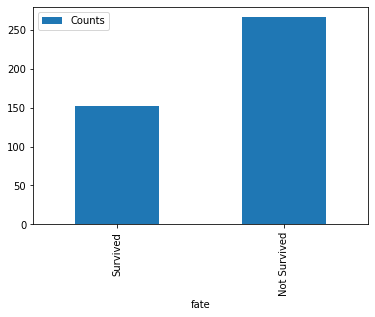

In [52]:
no_of_survived = survived.describe().iloc[0,0]
no_of_not_survived = not_survived.describe().iloc[0,0]

bar_graph = pd.DataFrame( { "fate":["Survived", "Not Survived"], "Counts":[no_of_survived, no_of_not_survived ] } )
ax = bar_graph.plot.bar(x='fate', y='Counts')

answer6 = no_of_survived / (no_of_survived + no_of_not_survived)
answer6 = (answer6*100).round(2)

In [53]:
grader.check("q6")

q6 results: All test cases passed!

**Question 7:**  What percent of the people who could not survive were women? Similarly, What percent of them were adults?
<br>**Answering Guidelines:** Your answers should be rounded off to 2 decimal places and should be assigned to answer7_female and answer7_adult. 
<!--
BEGIN QUESTION
name: q7
points: 3
-->

In [54]:
answer7_adult = not_survived.loc [ not_survived['Age'] >= 18 ].shape[0]
answer7_female = not_survived.loc [ not_survived['Sex'] == 'female' ].shape[0]

answer7_adult = ((answer7_adult/ no_of_not_survived)*100).round(2)
answer7_female = ((answer7_female/ no_of_not_survived)*100).round(2)



In [55]:
grader.check("q7")

q7 results: All test cases passed!

**Question 8:** What was the most preferred class by the passengers? Did this passenger class have the highest number of deaths as well? (Hint: Use groupby object)
<br>**Answering Guidelines:** Your answers should be strings '1'/'2'/'3' and 'Yes'/'No') stored in answer8_pclass and answer8_moredeaths respectively.
<!--
BEGIN QUESTION
name: q8
points: 3
-->

In [56]:
answer8_pclass = titanic_df.groupby('Pclass').size().idxmax()
answer8_pclass = str(answer8_pclass)

class_with_most_deaths = not_survived.groupby('Pclass').size().idxmax()
class_with_most_deaths = str(class_with_most_deaths)

if answer8_pclass == class_with_most_deaths:
    answer8_moredeaths = "Yes"
else:
    answer8_moredeaths = "No"

In [57]:
grader.check("q8")

q8 results: All test cases passed!

**Question 9:** Using a pivot table, represent the number of male and female passengers in each of the three passenger classes.
<br>**Answering Guidelines:** Your answer is a pivot table stored in q9_pivot 
<!--
BEGIN QUESTION
name: q9
points: 3
-->

In [58]:
q9_pivot = titanic_df.pivot_table(index = "Pclass", columns = "Sex", values ="Name", aggfunc = "count")
q9_pivot

Sex,female,male
Pclass,,
1,50,57
2,30,63
3,72,146


In [59]:
grader.check("q9")

q9 results: All test cases passed!

**Question 10:** Similarly, using a pivot table, represent the mean age of male and female passengers in each of the three passenger classes.
<br>**Answering Guidelines:** Your answer is a pivot table stored in q10_pivot 
<!--
BEGIN QUESTION
name: q9
points: 5
-->

In [60]:
q10_pivot = titanic_df.pivot_table(index = "Pclass", columns = "Sex", values ="Age", aggfunc = "mean")

In [61]:
grader.check("q10")

q10 results: All test cases passed!

**Question 11:** Which class had the lowest age to fare ratio? (Hint: Simply find the age to fare ratio for each passenger and locate which class contains the value with minimum ratio.)
<br>**Answering Guidelines:** Your answer should be a string ('1'/'2'/'3') stored in answer11 
<!--
BEGIN QUESTION
name: q11
points: 5
-->

In [62]:
answer11 = titanic_df.copy()
answer11["ratio"] = answer11["Age"]/answer11["Fare"]
answer11 = answer11.sort_values("ratio")
answer11 = str(answer11['Pclass'].iloc[0])


In [63]:
grader.check("q11")

q11 results: All test cases passed!

**Question 12:** Just a check point to let you know that you are doing greattt! :)
<br>**Answering Guidelines:** Have a small break if you want. 

**Question 13:** Replace the initials in the Embarked column with the exact port names. For the exact names, use the titanic_columns dataframe created earlier.
<br>**Answering Guidelines:** Your answer is the updated titanic_df. You do not need to explicitly assign this to any answer variable.
<!--
BEGIN QUESTION
name: q13
points: 3
-->

In [64]:
titanic_df = titanic_df.replace({'C':'Cherbourg', 'Q':'Queenstown', 'S':'Southampton'})

In [65]:
grader.check("q13")

q13 results: All test cases passed!

**Question 14:** Did the passengers who embarked on Cherbourg and travelled 3rd class have a higher survival rate than the passengers who embarked on Southampton and travelled first class?
<br>**Answering Guidelines:** Your answer should be a string ('Yes'/'No') stored in answer14
<!--
BEGIN QUESTION
name: q14
points: 3
-->

In [66]:
total_people_cherbourg = titanic_df.loc[ (titanic_df['Embarked'] == 'Cherbourg') & (titanic_df['Pclass'] == 3) ].shape[0]
total_people_south = titanic_df.loc[ (titanic_df['Embarked'] == 'Southampton') & (titanic_df['Pclass'] == 1) ].shape[0]

people_survived_cherbourg = survived.loc[ (survived['Embarked'] == 'C') & (survived['Pclass'] == 3) ].shape[0]
people_survived_south = survived.loc[ (survived['Embarked'] == 'S') & (survived['Pclass'] == 1) ].shape[0]

cherbourg_rate = people_survived_cherbourg / no_of_survived
south_rate = people_survived_south / no_of_survived

if cherbourg_rate > south_rate:
   answer14 = 'Yes'
else:
   answer14 = 'No'

In [67]:
grader.check("q14")

q14 results: All test cases passed!

**Question 15:** How many passengers who were unable to survive had atleast 3 more family members (excluding them) aboard?
<br>**Answering Guidelines:** Your answer is a whole number stored in answer15
<!--
BEGIN QUESTION
name: q15
points: 5
-->

In [68]:
answer15 = titanic_df.loc[ (titanic_df['Survived'] == 0) & (not_survived['SibSp'] + not_survived['ParCh'] >=3) ].shape[0]

In [69]:
grader.check("q15")

q15 results: All test cases passed!

To double-check your work, please run the following cell.

In [70]:
grader.check_all()

q1 results: All test cases passed!

q10 results: All test cases passed!

q11 results: All test cases passed!

q13 results: All test cases passed!

q14 results: All test cases passed!

q15 results: All test cases passed!

q2 results: All test cases passed!

q3 results: All test cases passed!

q4 results: All test cases passed!

q5 results: All test cases passed!

q6 results: All test cases passed!

q7 results: All test cases passed!

q8 results: All test cases passed!

q9 results: All test cases passed!